# Polymorphism
**`Polymorphism`** is the *ability* of a **variable, function, or object** to take *multiple forms*
For example, *classes* in the same hierarchical tree may have *methods* with same **name and signature**, but different implementations, so we can shove the objects within a single list, and call the same method of each of them, even if the **method body** is different:

In [2]:
class Creature():
    def move(self):
        print("the creature moves")
class Dragon(Creature):
    def move(self):
        print("the dragon flies")
class Kraken(Creature):
    def move(self):
        print("the kraken swims")
for creature in [Creature(), Dragon(), Kraken()]:
    creature.move()

the creature moves
the dragon flies
the kraken swims


### Example using hit-boxes:
In the last chapter, I created a code that checked if a unit was inside a determined area, but units are not points: they have their own areas. So now I am going to check if a dragon's body is within the fire area:

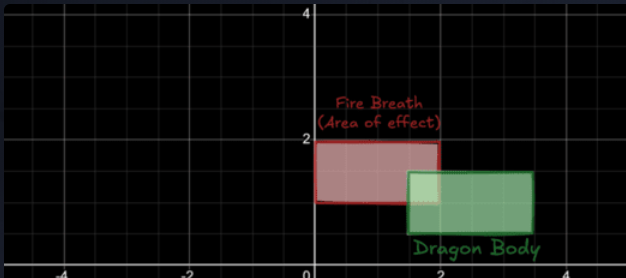


In [14]:
class Rectangle:
    
    def overlaps(self, rect):
        #This method checks if the current rectangle (self) overlaps a given one
        return not (self.get_right_x() < rect.get_left_x() or 
                self.get_left_x() > rect.get_right_x() or
                self.get_top_y() < rect.get_bottom_y() or 
                self.get_bottom_y() > rect.get_top_y())
        pass
    
    def __init__(self, x1, y1, x2, y2):
        self.__x1 = x1
        self.__y1 = y1
        self.__x2 = x2
        self.__y2 = y2
        pass
    def get_left_x(self):
        return min(self.__x1,self.__x2)
        pass

    def get_right_x(self):
        return max(self.__x1,self.__x2)
        pass

    def get_top_y(self):
        return max(self.__y1,self.__y2)
        pass

    def get_bottom_y(self):
        return min(self.__y1,self.__y2)
        pass

    # don't touch below this line

    def __repr__(self):
        return f"Rectangle({self.__x1}, {self.__y1}, {self.__x2}, {self.__y2})"

rect1 = Rectangle(0, 0, 4, 1)
rect2 = Rectangle(1, 2, 3, 3)
rect1.overlaps(rect2)

False

In [15]:
run_cases = [
    (Rectangle(0, 0, 4, 4), Rectangle(3, 3, 6, 6), True),
    (Rectangle(0, 0, 4, 4), Rectangle(5, 5, 8, 8), False),
]

submit_cases = run_cases + [
    (Rectangle(0, 0, 1, 1), Rectangle(4, 4, 5, 5), False),
    (Rectangle(1, 1, 4, 4), Rectangle(2, 2, 3, 3), True),
    (Rectangle(1, 1, 2, 2), Rectangle(0, 0, 4, 4), True),
    (Rectangle(1, 1, 4, 4), Rectangle(1, 1, 4, 4), True),
    (Rectangle(0, 0, 4, 1), Rectangle(1, 2, 3, 3), False),
]


def test(rect1, rect2, expected_overlap):
    print("---------------------------------")
    print(f"Checking overlap of:")
    print(f" - {rect1}")
    print(f" - {rect2}")
    print("")
    print(f"Expected overlap: {expected_overlap}")

    result = rect1.overlaps(rect2)
    print(f"Actual overlap:   {result}")

    if result == expected_overlap:
        print("Pass")
        return True
    else:
        print("Fail")
        return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()


---------------------------------
Checking overlap of:
 - Rectangle(0, 0, 4, 4)
 - Rectangle(3, 3, 6, 6)

Expected overlap: True
Actual overlap:   True
Pass
---------------------------------
Checking overlap of:
 - Rectangle(0, 0, 4, 4)
 - Rectangle(5, 5, 8, 8)

Expected overlap: False
Actual overlap:   False
Pass
---------------------------------
Checking overlap of:
 - Rectangle(0, 0, 1, 1)
 - Rectangle(4, 4, 5, 5)

Expected overlap: False
Actual overlap:   False
Pass
---------------------------------
Checking overlap of:
 - Rectangle(1, 1, 4, 4)
 - Rectangle(2, 2, 3, 3)

Expected overlap: True
Actual overlap:   True
Pass
---------------------------------
Checking overlap of:
 - Rectangle(1, 1, 2, 2)
 - Rectangle(0, 0, 4, 4)

Expected overlap: True
Actual overlap:   True
Pass
---------------------------------
Checking overlap of:
 - Rectangle(1, 1, 4, 4)
 - Rectangle(1, 1, 4, 4)

Expected overlap: True
Actual overlap:   True
Pass
---------------------------------
Checking overlap of:

The **in_area** method checked if a unit was inside the breath of fire area, but a dragon is bigger than any unit. Since **`Dragon`** is a child class of **`Unit`**, it can override the **`in_area`** of the **`Unit`** class with its own behavior. The **`Dragon`** still acts like a **`Unit`** (since it has the **in_area** method) but now, it has its own implementation. 

---
Now, I will use **`polymorphism`** to override the ***in_area*** method inherited.

In [21]:
class Unit:
    def __init__(self, name, pos_x, pos_y):
        self.name = name
        self.pos_x = pos_x
        self.pos_y = pos_y
    def in_area(self, x1, y1, x2, y2):
        return (
            self.pos_x >= x1
            and self.pos_x <= x2
            and self.pos_y >= y1
            and self.pos_y <= y2)

class Dragon(Unit):
    def __init__(self, name, pos_x, pos_y, height, width, fire_range):
        super().__init__(name, pos_x, pos_y)
        self.height = height
        self.width = width
        self.fire_range = fire_range
        self.__hit_box = Rectangle(self.pos_x - self.width/2,
                                  self.pos_y - self.height/2,
                                  self.pos_x + self.width/2,
                                   self.pos_y + self.height/2)
    def in_area(self, x1, y1, x2, y2):
        rectangle = Rectangle(x1, y1, x2, y2)
        return rectangle.overlaps(self.__hit_box)

class Rectangle:
    
    def __init__(self, x1, y1, x2, y2):
        self.__x1 = x1
        self.__y1 = y1
        self.__x2 = x2
        self.__y2 = y2
    def get_left_x(self):
        if self.__x1 < self.__x2:
            return self.__x1
        return self.__x2
    def get_right_x(self):
        if self.__x1 > self.__x2:
            return self.__x1
        return self.__x2
    def get_top_y(self):
        if self.__y1 > self.__y2:
            return self.__y1
        return self.__y2
    def get_bottom_y(self):
        if self.__y1 < self.__y2:
            return self.__y1
        return self.__y2
    def overlaps(self, rect):
        return not (self.get_right_x() < rect.get_left_x() or 
                self.get_left_x() > rect.get_right_x() or
                self.get_top_y() < rect.get_bottom_y() or 
                self.get_bottom_y() > rect.get_top_y())

In [22]:
run_cases = [
    (Dragon("Green Dragon", -1, -2, 1, 2, 1), -2, -3, 0, 0, True),
    (Dragon("Red Dragon", 2, 2, 2, 2, 2), 0, 1, 1, 0, True),
    (Dragon("Gold Dragon", 0, 0, 5, 5, 10), 4, 0, 5, 1, False),
    (Dragon("Blue Dragon", 4, -3, 2, 1, 1), 0, 0, 10, 10, False),
]

submit_cases = run_cases + [
    (Dragon("Orange Dragon", 0, 0, 20, 20, 20), 10, 10, 20, 20, True),
    (Dragon("Black Dragon", 5, -1, 3, 2, 2), -10, -10, 10, 10, True),
]


def test(dragon, x1, y1, x2, y2, expected_output):
    print("---------------------------------")
    print(f" * Dragon pos_x: {dragon.pos_x}")
    print(f" * Dragon pos_y: {dragon.pos_y}")
    print(f" * Dragon height: {dragon.height}")
    print(f" * Dragon width: {dragon.width}")
    print("")
    print(f" * Area x1: {x1}")
    print(f" * Area y1: {y1}")
    print(f" * Area x2: {x2}")
    print(f" * Area y2: {y2}")
    print("")
    result = dragon.in_area(x1, y1, x2, y2)
    print(f"Expected in area: {expected_output}")
    print(f"Actual in area:   {result}")
    if result == expected_output:
        return True
    return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            print("Pass")
            passed += 1
        else:
            print("Fail")
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
 * Dragon pos_x: -1
 * Dragon pos_y: -2
 * Dragon height: 1
 * Dragon width: 2

 * Area x1: -2
 * Area y1: -3
 * Area x2: 0
 * Area y2: 0

Expected in area: True
Actual in area:   True
Pass
---------------------------------
 * Dragon pos_x: 2
 * Dragon pos_y: 2
 * Dragon height: 2
 * Dragon width: 2

 * Area x1: 0
 * Area y1: 1
 * Area x2: 1
 * Area y2: 0

Expected in area: True
Actual in area:   True
Pass
---------------------------------
 * Dragon pos_x: 0
 * Dragon pos_y: 0
 * Dragon height: 5
 * Dragon width: 5

 * Area x1: 4
 * Area y1: 0
 * Area x2: 5
 * Area y2: 1

Expected in area: False
Actual in area:   False
Pass
---------------------------------
 * Dragon pos_x: 4
 * Dragon pos_y: -3
 * Dragon height: 2
 * Dragon width: 1

 * Area x1: 0
 * Area y1: 0
 * Area x2: 10
 * Area y2: 10

Expected in area: False
Actual in area:   False
Pass
---------------------------------
 * Dragon pos_x: 0
 * Dragon pos_y: 0
 * Dragon height: 20
 * Dragon width:

# Polymorphism Review
**`Polymorphism`** is the ability to present the same interface (**function or method signature**) for many different *underlying* forms. 
> A classis example is a **`shape class`** that **Rectangle, Circle and Triangle** can *inherit* from. They need different *underlying data*:
> - Circle need center pont and radius
> - Rectangle needs two coordintes at last
> - Triangle need coordinates for corners
> **`Polymorphism`** is where each type is responsible for its own data and code, but still adheres to the same *interface*, like the signature:
>   `def draw_shape(self)`

Now, it doesn't matter the figure, we can treat shapes as the **same**, even though they are different

> ### **`Polymorphism`** hide complexities of the difference behind clean **abstraction**

Like this:

In [ ]:
shapes = [Circle(5, 5, 10), Rectangle(1, 3, 5, 6)]
for shape in shapes:
    print(shape.draw_shape())

### Function Signature
A **`function signature`** or **method signature** includes the *name, inputs and outputs* of a function or method. For example, **`hit_by_fire`** in the **human** and **archer** classes have identical signatures:

In [24]:
class Human:
    def hit_by_fire(self):
        self.health -= 5
        return self.health

class Archer:
    def hit_by_fire(self):
        self.health -= 10
        return self.health

If any of those things (name, I/O) were *different*, they would have different **`function signatures`**:

In [25]:
class Human:
    def hit_by_fire(self):
        self.health -= 5
        return self.health

class Archer:
    def hit_by_fire(self, dmg):
        self.health -= dmg
        return self.health

# Operator Overloading
Another kind of built-in polymorphism in Python is the ability to *override* how an operator works. For example, **+** operator work for buil-in types like int and str:

In [26]:
print(3 + 4)
print("three " + "four")

7
three four


**`Custom classes`** on the other hand don't have any built-in support:

In [27]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y


p1 = Point(4, 5)
p2 = Point(2, 3)
p3 = p1 + p2

TypeError: unsupported operand type(s) for +: 'Point' and 'Point'

But we can add support by creating a **method**. Now, the Python interpreter will use it when instances of the class are being added with **+** operator:

In [31]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, point):
        x = self.x + point.x
        y = self.y + point.y
        return Point(x, y)

p1 = Point(4, 5)
p2 = Point(2, 3)
p3 = p1 + p2 #This is p1.__add__(p2)

## Example
Using **operator overloading** on **`Sword`** class

In [36]:
class Sword:
    def __init__(self, sword_type):
        self.sword_type = sword_type
        
    def __add__(self,other):
        if self.sword_type == 'bronze' and other.sword_type == 'bronze':
            return Sword('iron')
        elif self.sword_type == 'iron' and other.sword_type == 'iron':
            return Sword('steel')
        else:
            raise Exception('cannot craft')

In [35]:
run_cases = [
    (Sword("bronze"), Sword("bronze"), "iron", None),
    (Sword("bronze"), Sword("iron"), None, "cannot craft"),
]

submit_cases = run_cases + [
    (Sword("steel"), Sword("steel"), None, "cannot craft"),
    (Sword("iron"), Sword("iron"), "steel", None),
    (Sword("bronze"), Sword("steel"), None, "cannot craft"),
]


def test(sword1, sword2, expected_result, expected_err):
    try:
        print("---------------------------------")
        print(f"{sword1.sword_type} sword + {sword2.sword_type} sword...")
        result = sword1 + sword2

        if expected_err:
            print(f"Expected Exception: {expected_err}")
            print("Actual Exception:    None")
            return False

        print(f"Expected: {expected_result}")
        print(f"Actual:   {result.sword_type}")
        if result.sword_type != expected_result:
            return False

    except Exception as e:
        print(f"Expected Exception: {expected_err}")
        print(f"Actual Exception:   {e}")
        if expected_err != str(e):
            return False

    return True


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
bronze sword + bronze sword...
Expected: iron
Actual:   iron
---------------------------------
bronze sword + iron sword...
Expected Exception: cannot craft
Actual Exception:   cannot craft
---------------------------------
steel sword + steel sword...
Expected Exception: cannot craft
Actual Exception:   cannot craft
---------------------------------
iron sword + iron sword...
Expected: steel
Actual:   steel
---------------------------------
bronze sword + steel sword...
Expected Exception: cannot craft
Actual Exception:   cannot craft
============= PASS ==============
5 passed, 0 failed


### Operator Overload Review
Formally, **`operator overloading`** is the practice of *defining custom behavior* for standard Python operators. A list of how operators translate into method names:
| Operation | Operator | **Method** |
| :--- | :---: | ---: |
| Addition | + | __add__ |
| Subtraction | - | __sub__ |
| Multiplication | * | __mult__ |
| Power | ** | __pow__ |
| Division | / | __truediv__ |
| Floor division | // | __floordiv__ |
| Remainder (modulo) | % | __mod__ |
| Bitwise Left Shift | << | __lshift__ |
| Bitwise Right Shift | >> | __rshift__ |
| Bitwise AND | $ | __and__ |
| Bitwise OR | || __or__ |
| Bitwise XOR | ^ | __xor__ |
| Bitwise NOT | ~ | __invert__ |
| Equal to | == | __eq__ |
| Greater than | > | __gt__ |
| Less than | < | __lt__ |

# Overriding Built-In Methods
If we try to print an object like `p1 = Point(4,5) \n print(p1)`, this will print `<Point object at 0xa0acf8>`, which is not **useful**. 

Instead of just printing the object, we can use the **`__str__`** method. It takes no inputs, but returns a string that will be printed to the console when someone passes an instance of the class to `print()`: 

In [37]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return f"({self.x},{self.y})"

p1 = Point(4, 5)
print(p1)
# prints "(4,5)"

(4,5)


**`__repr__`** method works similarly, but is intended for debugging

---
**Example**:

In [38]:
class Dragon:
    def __init__(self, name, color):
    # A dragon is created
        self.name = name
        self.color = color

    def __str__(self):
        return f'I am {self.name}, the {self.color} dragon'
        pass
dragon_red = Dragon("Smaug", "red")
print(dragon_red)

I am Smaug, the red dragon


# Examples

Continue working on the card game started earlier. This adds some logic to **`Card`** class, to simplify comparing one instance of **`Card`** to another:

In [10]:
SUITS = ["Clubs", "Diamonds", "Hearts", "Spades"]
RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]

class Card:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit 
        self.rank_index = RANKS.index(rank)
        self.suit_index = SUITS.index(suit)
        pass

    def __eq__(self, other):
        return (self.rank_index == other.rank_index and self.suit_index == other.suit_index)
        pass

    def __lt__(self, other):
        # Return True if self is lt than other
        if self.rank_index == other.rank_index:
            return self.suit_index < other.suit_index
        elif self.rank_index < other.rank_index
            
        pass

    def __gt__(self, other):
        # return true if self is gt than other
        if self.rank_index == other.rank_index:
            return self.suit_index > other.suit_index
        return self.rank_index > other.rank_index
        pass

    def __str__(self):
        return f"{self.rank} of {self.suit}"
card1 = Card("Ace","Clubs")
card2 = Card("10", "Hearts")
print(card1 < card2)
print(card1 > card2)
print(card1 == card2)

False
True
False


In [8]:
SUITS = ["Clubs", "Diamonds", "Hearts", "Spades"]

RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]

run_cases = [
    ("Ace", "Hearts", "Queen", "Hearts", False, True),
    ("2", "Spades", "2", "Hearts", False, True),
]

submit_cases = run_cases + [
    ("Ace", "Spades", "Ace", "Spades", True, False),
    ("3", "Diamonds", "7", "Clubs", False, False),
    ("King", "Clubs", "King", "Hearts", False, False),
    ("Queen", "Diamonds", "Jack", "Spades", False, True),
    ("10", "Hearts", "10", "Hearts", True, False),
]


def test(rank_1, suit_1, rank_2, suit_2, expected_eq, expected_gt):
    print("---------------------------------")
    print(f"Inputs: {rank_1} of {suit_1}, {rank_2} of {suit_2}")
    print("Expected:")
    print(f" * Equal: {expected_eq}")
    print(f" * Greater than: {expected_gt}")
    print(f" * Less than: {not (expected_eq or expected_gt)}")

    card_1 = Card(rank_1, suit_1)
    card_2 = Card(rank_2, suit_2)
    result_eq = card_1 == card_2
    result_gt = card_1 > card_2
    result_lt = card_1 < card_2
    print("Actual:")
    print(f" * Equal: {result_eq}")
    if result_eq != expected_eq:
        print("Fail")
        return False
    print(f" * Greater than: {result_gt}")
    if result_gt != expected_gt:
        print("Fail")
        return False
    print(f" * Less than: {result_lt}")
    if result_lt != (not (expected_eq or expected_gt)):
        print("Fail")
        return False
    print("Pass")
    return True


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()


---------------------------------
Inputs: Ace of Hearts, Queen of Hearts
Expected:
 * Equal: False
 * Greater than: True
 * Less than: False
Actual:
 * Equal: False
 * Greater than: True
 * Less than: False
Pass
---------------------------------
Inputs: 2 of Spades, 2 of Hearts
Expected:
 * Equal: False
 * Greater than: True
 * Less than: False
Actual:
 * Equal: False
 * Greater than: True
 * Less than: False
Pass
---------------------------------
Inputs: Ace of Spades, Ace of Spades
Expected:
 * Equal: True
 * Greater than: False
 * Less than: False
Actual:
 * Equal: True
 * Greater than: False
 * Less than: False
Pass
---------------------------------
Inputs: 3 of Diamonds, 7 of Clubs
Expected:
 * Equal: False
 * Greater than: False
 * Less than: True
Actual:
 * Equal: False
 * Greater than: False
 * Less than: True
Pass
---------------------------------
Inputs: King of Clubs, King of Hearts
Expected:
 * Equal: False
 * Greater than: False
 * Less than: True
Actual:
 * Equal: False
 

### Extending the **`Card`** logic to make a simple high-card low-card game
Where we compare two cards and, depending on the round **(high or low)**, determine the winner:
> **`HighCardRound`**: Highest card win
> 
> **`LowCardRound`**: Lowest card win

In [32]:
SUITS = ["Clubs", "Diamonds", "Hearts", "Spades"]
RANKS = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]

class Card:
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit 
        self.rank_index = RANKS.index(rank)
        self.suit_index = SUITS.index(suit)
        pass

    def __eq__(self, other):
        return (self.rank_index == other.rank_index and self.suit_index == other.suit_index)
        pass

    def __lt__(self, other):
        # Return True if self is lt than other
        if self.rank_index == other.rank_index:
            return self.suit_index < other.suit_index
        return self.rank_index < other.rank_index
            
        pass

    def __gt__(self, other):
        # return true if self is gt than other
        if self.rank_index == other.rank_index:
            return self.suit_index > other.suit_index
        return self.rank_index > other.rank_index
        pass

    def __str__(self):
        return f"{self.rank} of {self.suit}"

class Round:
    def resolve_round(self):
        raise NotImplementedError("Subclasses must implement resolve_round()")

class HighCardRound(Round):
    
    def __init__(self, card1, card2):
        #These two param will be passes to the method as instance variables of Card
        self.card1 = card1
        self.card2 = card2

    def resolve_round(self):
        if self.card1 == self.card2:
            return 0
        elif self.card1 > self.card2:
            return 1
        else:
            return 2
    pass
class LowCardRound(Round):
    def __init__(self, card1, card2):
        self.card1 = card1
        self.card2 = card2
    def resolve_round(self):
        if self.card1 == self.card2:
            return 0
        elif self.card1 < self.card2:
            return 1
        else:
            return 2
    pass
card1 = Card("10", "Clubs")
card2 = Card("10", "Spades")
high_round = HighCardRound(card1, card2)
high_round.resolve_round()


2

In [30]:
run_cases = [
    (Card("Ace", "Spades"), Card("2", "Clubs"), 1, 2),
    (Card("Queen", "Hearts"), Card("Queen", "Diamonds"), 1, 2),
]

submit_cases = run_cases + [
    (Card("10", "Clubs"), Card("10", "Spades"), 2, 1),
    (Card("King", "Hearts"), Card("Queen", "Spades"), 1, 2),
    (Card("2", "Diamonds"), Card("2", "Diamonds"), 0, 0),
    (Card("5", "Clubs"), Card("10", "Hearts"), 2, 1),
    (Card("Jack", "Spades"), Card("2", "Spades"), 1, 2),
]


def result_to_card(card1, card2, placement):
    if placement == 1:
        return card1
    elif placement == 2:
        return card2
    else:
        return "Tie"


def test(card1, card2, expected_high_winner, expected_low_winner):
    try:
        print("---------------------------------")
        print(f"Inputs:")
        print(f" * card1: {card1}")
        print(f" * card2: {card2}")

        print("\nTesting HighCardRound:")
        high_round = HighCardRound(card1, card2)
        high_result = high_round.resolve_round()
        expected_winner = result_to_card(card1, card2, expected_high_winner)
        actual_winner = result_to_card(card1, card2, high_result)
        print(f"Expected winner: {expected_winner}")
        print(f"Actual winner:   {actual_winner}")
        high_correct = high_result == expected_high_winner

        print("\nTesting LowCardRound:")
        low_round = LowCardRound(card1, card2)
        low_result = low_round.resolve_round()
        expected_winner = result_to_card(card1, card2, expected_low_winner)
        actual_winner = result_to_card(card1, card2, low_result)
        print(f"Expected winner: {expected_winner}")
        print(f"Actual winner:   {actual_winner}")
        low_correct = low_result == expected_low_winner

        if high_correct and low_correct:
            print("Pass")
            return True
        print("Fail")
        return False
    except Exception as e:
        print(f"Error: {e}")
        print("Fail")
        return False


def main():
    passed = 0
    failed = 0
    skipped = len(submit_cases) - len(test_cases)
    for test_case in test_cases:
        correct = test(*test_case)
        if correct:
            passed += 1
        else:
            failed += 1
    if failed == 0:
        print("============= PASS ==============")
    else:
        print("============= FAIL ==============")
    if skipped > 0:
        print(f"{passed} passed, {failed} failed, {skipped} skipped")
    else:
        print(f"{passed} passed, {failed} failed")


test_cases = submit_cases
if "__RUN__" in globals():
    test_cases = run_cases

main()

---------------------------------
Inputs:
 * card1: Ace of Spades
 * card2: 2 of Clubs

Testing HighCardRound:
Expected winner: Ace of Spades
Actual winner:   Ace of Spades

Testing LowCardRound:
Expected winner: 2 of Clubs
Actual winner:   2 of Clubs
Pass
---------------------------------
Inputs:
 * card1: Queen of Hearts
 * card2: Queen of Diamonds

Testing HighCardRound:
Expected winner: Queen of Hearts
Actual winner:   Queen of Hearts

Testing LowCardRound:
Expected winner: Queen of Diamonds
Actual winner:   Queen of Diamonds
Pass
---------------------------------
Inputs:
 * card1: 10 of Clubs
 * card2: 10 of Spades

Testing HighCardRound:
Expected winner: 10 of Spades
Actual winner:   10 of Spades

Testing LowCardRound:
Expected winner: 10 of Clubs
Actual winner:   10 of Clubs
Pass
---------------------------------
Inputs:
 * card1: King of Hearts
 * card2: Queen of Spades

Testing HighCardRound:
Expected winner: King of Hearts
Actual winner:   King of Hearts

Testing LowCardRound